In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train_values = pd.read_csv('C:/Users/user/Downloads/train_values.csv')
test_values = pd.read_csv('C:/Users/user/Downloads/test_values.csv')
train_labels = pd.read_csv('C:/Users/user/Downloads/train_labels.csv')

# 'status_group' column is assigned the status of each waterpoint, 'test' if unknown (i.e. the waterpoint belongs to
# the test dataset)
train_values['status_group']=train_labels.status_group
test_values['status_group']=['test']*test_values.shape[0]
# 'train' column discerns if the waterpoint belongs to the training group or the testing group
train_values['train']=[True]*train_values.shape[0]
test_values['train']=[False]*test_values.shape[0]
df = pd.concat([train_values,test_values])

In [4]:
train_labels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [5]:
train_values

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,train
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,True
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,True
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,True
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,True
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,True
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,True
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,True
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,True


In [6]:
train_values.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group', 'train'],
      dtype='object')

In [8]:
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,train
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,True
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,True
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,True
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,True
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,test,False
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,test,False
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,test,False
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,test,False


In [9]:
nulls = df.isnull().sum()

In [10]:
nulls

id                           0
amount_tsh                   0
date_recorded                0
funder                    4507
gps_height                   0
installer                 4532
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 470
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            4155
recorded_by                  0
scheme_management         4847
scheme_name              36052
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [11]:
nulls[nulls!=0]

funder                4507
installer             4532
wpt_name                 2
subvillage             470
public_meeting        4155
scheme_management     4847
scheme_name          36052
permit                3793
dtype: int64

In [17]:
null_per = round((nulls[nulls!=0]/df.shape[0])*100,2)

In [18]:
null_per

funder                6.07
installer             6.10
wpt_name              0.00
subvillage            0.63
public_meeting        5.60
scheme_management     6.53
scheme_name          48.55
permit                5.11
dtype: float64

In [16]:
# here the 'scheme_name ' has null values more than 47% , so we can delete that rows

In [ ]:
features_original = df.shape[1]
df.dropna(axis='columns',how='any',inplace=True)
features_reduced = df.shape[1]
print('number of features reduced from %d to %d'%(features_original,features_reduced))

In [30]:
# this is no of columns in the data frame
feature_original = df.shape[1]

# this is no of rows in the data frame
df.shape[0]

In [31]:
df.dropna(axis='columns', how='any', inplace = True)

In [33]:
features_reduced = df.shape[1]

In [35]:
print('number of features reduced from %d to %d'%(feature_original,features_reduced))

number of features reduced from 42 to 34


In [38]:
df.select_dtypes(include='number').nunique()

id                   74250
amount_tsh             102
gps_height            2456
longitude            71870
latitude             71869
num_private             68
region_code             27
district_code           20
population            1128
construction_year       55
dtype: int64

In [39]:
df['num_private'] = df.num_private.astype(str)
df['region_code'] = df.region_code.astype(str)
df['district_code'] = df.district_code.astype(str)

In [40]:
df.select_dtypes(include='number').nunique()

id                   74250
amount_tsh             102
gps_height            2456
longitude            71870
latitude             71869
population            1128
construction_year       55
dtype: int64

In [41]:
uniques = df.select_dtypes(exclude='number').nunique()
uniques

date_recorded             369
num_private                68
basin                       9
region                     21
region_code                27
district_code              20
lga                       125
ward                     2098
recorded_by                 1
extraction_type            18
extraction_type_group      13
extraction_type_class       7
management                 12
management_group            5
payment                     7
payment_type                7
water_quality               8
quality_group               6
quantity                    5
quantity_group              5
source                     10
source_type                 7
source_class                3
waterpoint_type             7
waterpoint_type_group       6
status_group                4
train                       2
dtype: int64

In [48]:
df.select_dtypes(exclude='number').nunique()

date_recorded            369
num_private               68
basin                      9
region                    21
region_code               27
district_code             20
lga                      125
recorded_by                1
extraction_type           18
extraction_type_group     13
extraction_type_class      7
management                12
management_group           5
payment                    7
payment_type               7
water_quality              8
quality_group              6
quantity                   5
quantity_group             5
source                    10
source_type                7
source_class               3
waterpoint_type            7
waterpoint_type_group      6
status_group               4
train                      2
dtype: int64

In [53]:
thresh = 100
for col in df.select_dtypes(exclude='number').columns:
    count_values = df[col].value_counts()
    if count_values.min(axis=0) < thresh:
        df.drop(columns=col, inplace =True)

In [56]:
df.select_dtypes(exclude='number').nunique()

basin                     9
region                   21
recorded_by               1
extraction_type_group    13
extraction_type_class     7
management               12
management_group          5
payment                   7
payment_type              7
quality_group             6
quantity                  5
quantity_group            5
source_type               7
source_class              3
status_group              4
train                     2
dtype: int64

In [57]:
print('total number of features: %d\n'%(df.shape[1]))
df.dtypes

total number of features: 23



id                         int64
amount_tsh               float64
gps_height                 int64
longitude                float64
latitude                 float64
basin                     object
region                    object
population                 int64
recorded_by               object
construction_year          int64
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
quality_group             object
quantity                  object
quantity_group            object
source_type               object
source_class              object
status_group              object
train                       bool
dtype: object

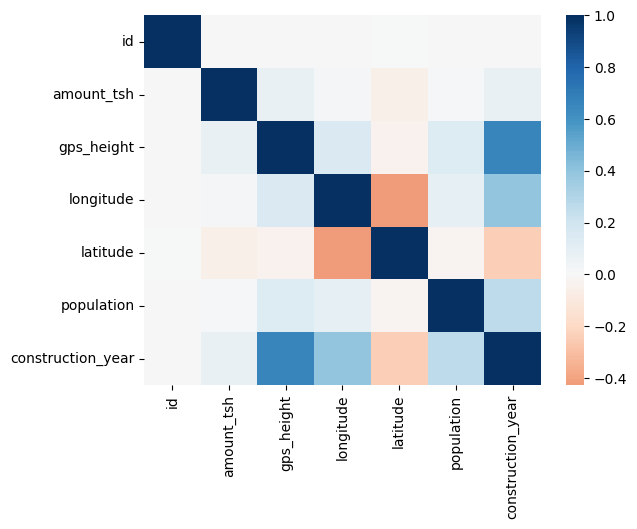

In [61]:
# Assuming df is your DataFrame
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numeric_df.corr()  # Compute correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, cmap='RdBu', center=0)
plt.show()

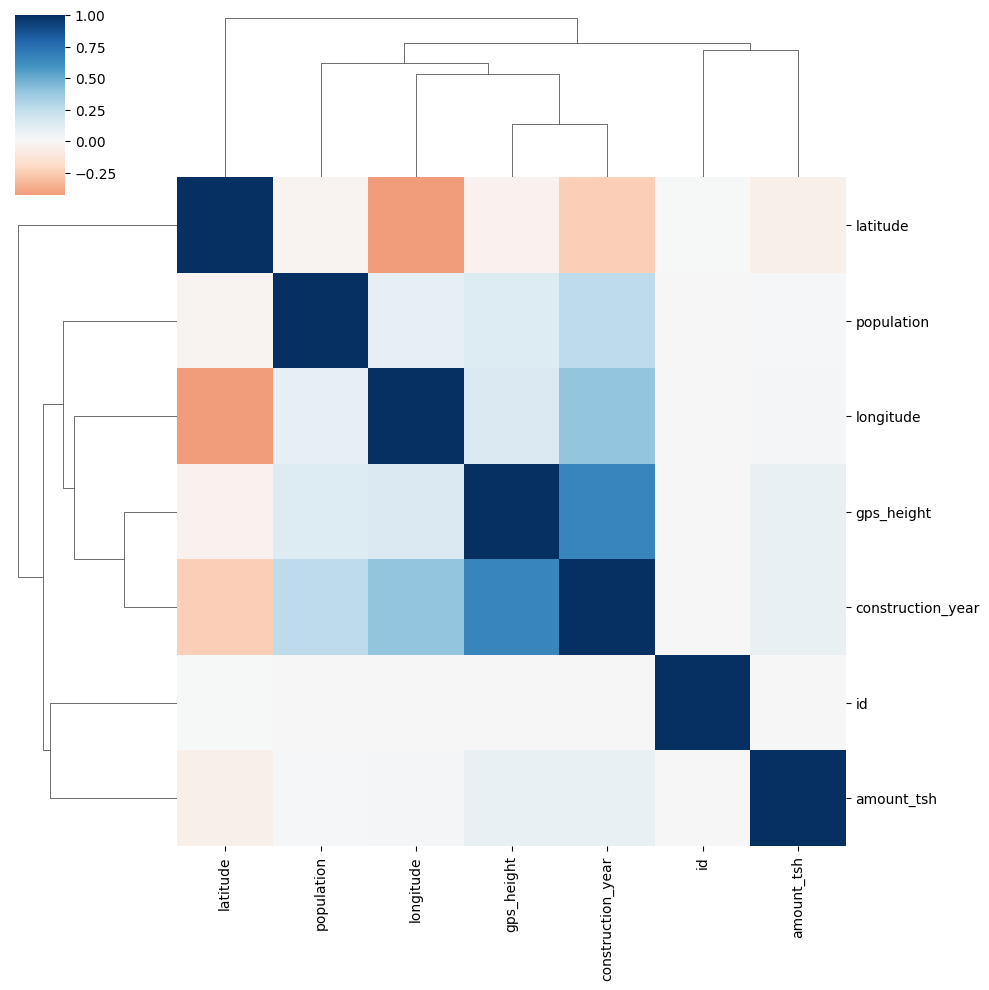

In [63]:
sns.clustermap(correlation_matrix, cmap='RdBu',center=0)

In [64]:
df.drop(columns = ['amount_tsh','id','recorded_by'],inplace=True)

In [65]:
df.columns

Index(['gps_height', 'longitude', 'latitude', 'basin', 'region', 'population',
       'construction_year', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'quality_group', 'quantity', 'quantity_group', 'source_type',
       'source_class', 'status_group', 'train'],
      dtype='object')

In [66]:
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numeric_df.corr() 

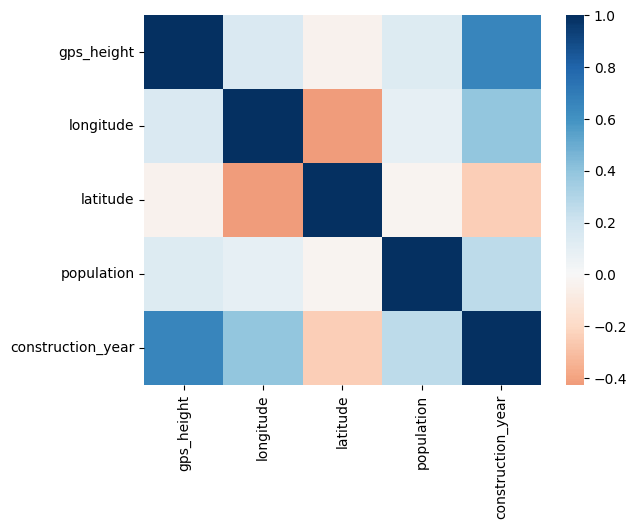

In [72]:
sns.heatmap(correlation_matrix, cmap='RdBu', center=0)
plt.show()